# Hackathon

Project Definition: https://docs.google.com/document/d/1OegVgjqh91K4sMcmrgDP_uGt3SDfz62PBCaQyTEMkhM/edit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cart = pd.read_csv('./bookstore/cart.csv')

In [3]:
cart.head()

,event_time,event_type,isbn,category,price,user_id,user_agent
0,2019-11-01 00:00:51 UTC,remove_from_cart,978-1-68177-962-1,Bibles,5.54,566239468.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_6 ...
1,2019-11-01 00:02:02 UTC,view,978-1-121-11580-4,Study Aids,7.14,NaN,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...
2,2019-11-01 00:03:38 UTC,cart,978-1-72613-750-8,Biography & Autobiography,20.16,565876667.0,Opera/9.54.(Windows NT 5.2; ku-TR) Presto/2.9....
3,2019-11-01 00:03:54 UTC,view,978-0-01-454531-5,Nature,15.71,562076640.0,Mozilla/5.0 (Linux; Android 4.1.2) AppleWebKit...
4,2019-11-01 00:07:14 UTC,view,978-1-4168-4283-5,Games & Activities,24.92,565876667.0,Opera/9.54.(Windows NT 5.2; ku-TR) Presto/2.9....


In [4]:
cart.dtypes

event_time     object
event_type     object
isbn           object
category       object
price         float64
user_id       float64
user_agent     object
dtype: object

In [5]:
cart.isna().sum()

event_time        0
event_type        0
isbn              0
category          0
price             0
user_id       30973
user_agent        0
dtype: int64

In [6]:
len(cart)

100000

In [168]:
len(users)

49609

So we have 100k rows, and 30.9k have not signed up

In [7]:
cart['event_type'].unique()

array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

In [8]:
cart.groupby('user_id')[['event_time', 'event_type']].head()

,event_time,event_type
0,2019-11-01 00:00:51 UTC,remove_from_cart
1,2019-11-01 00:02:02 UTC,view
2,2019-11-01 00:03:38 UTC,cart
3,2019-11-01 00:03:54 UTC,view
4,2019-11-01 00:07:14 UTC,view
...,...,...
99995,2019-11-30 22:22:24 UTC,purchase
99996,2019-11-30 22:28:22 UTC,purchase
99997,2019-11-30 22:56:03 UTC,purchase
99998,2019-11-30 23:09:47 UTC,purchase


In [116]:
cart['user_id'].isna().sum()

30973

In [115]:
cart['user_id'] = cart['user_id'].astype('int')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
cart['user_id'].dtype

In [85]:
# group by a user id, and then find those rows by index in my df to view all cart activity



In [10]:
# where in the process is the signup? View -> Cart -> Signup -> Purchase
# or View -> Cart -> Remove from Cart


In [11]:
users = pd.read_csv('./bookstore/users.csv')

users.head()

,user_id,username,password,title,name,suffix,sex,address,email,birthdate,credit_card_number,credit_card_expire,credit_card_provider,credit_card_security_code
0,305464808,kirkt90,7QjsS,NaN,"Kirk, T.",NaN,F,"88146 Brian Burg Suite 871\nSouth Marcton, NV ...",kirkt@yahoo.com,Nov 16 1959,4448988541220362,01/26,VISA,648
1,415424718,kristenwest26,f5XfW,NaN,Kristen West,NaN,F,"386 Angela Trafficway\nSouth Sarah, NH 63374",kristenwest@yahoo.com,11/15/06,30078155364052,08/23,VISA,688
2,491534059,jodihester6,8xwDc,NaN,Jodi Hester,NaN,F,"52461 Joel Route Apt. 492\nWest Candace, IL 45057",jodihester@gmail.com,1936-03-07,3573829156543392,04/21,VISA,46
3,344018551,rosejudy96,6AjYt,NaN,"Rose, Judy",NaN,F,"077 Patterson Mountains\nChristophermouth, HI ...",rosejudy@hotmail.com,09/06/99,5177223986533879,06/26,Mastercard,35
4,308521287,joshuakochdds21,s8Eld,Mr.,Joshua Koch,DDS,M,"7083 Samantha Streets Suite 832\nAndrewview, C...",joshuakochdds@hotmail.com,Sep 08 1913,3523787527165249,07/28,VISA,668


In [ ]:
users['user_id'] = users['user_id'].astype()

In [111]:
users['user_id'].dtype

dtype('int64')

SyntaxError: invalid syntax (<ipython-input-113-470a7da0f729>, line 1)

In [12]:
users['birthdate_time'] = pd.to_datetime(users['birthdate'], infer_datetime_format=True)

In [13]:
users['birthdate_time']

0       1959-11-16
1       2006-11-15
2       1936-03-07
3       1999-09-06
4       1913-09-08
           ...    
49604   1933-05-23
49605   1929-10-25
49606   1925-10-06
49607   1973-02-03
49608   2017-05-08
Name: birthdate_time, Length: 49609, dtype: datetime64[ns]

In [14]:
pd.datetime.now()

datetime.datetime(2020, 2, 22, 15, 38, 38, 144032)

In [15]:
users['age'] = (pd.datetime.now() - users['birthdate_time'])

In [16]:
61 * 365

22265

In [17]:
users['age']

0       22013 days 15:38:38.150491
1        4847 days 15:38:38.150491
2       30667 days 15:38:38.150491
3        7474 days 15:38:38.150491
4       38883 days 15:38:38.150491
                   ...            
49604   31686 days 15:38:38.150491
49605   32992 days 15:38:38.150491
49606   34472 days 15:38:38.150491
49607   17185 days 15:38:38.150491
49608    1020 days 15:38:38.150491
Name: age, Length: 49609, dtype: timedelta64[ns]

In [18]:
users['age'].isna().sum()

0

In [19]:
users['age_years'] = str(users['age']).split()[1]

In [20]:
users['age_years'] = (users['age'].apply(lambda x: str(x).split()[0]))

In [21]:
users['age_years']

0        22013
1         4847
2        30667
3         7474
4        38883
         ...  
49604    31686
49605    32992
49606    34472
49607    17185
49608     1020
Name: age_years, Length: 49609, dtype: object

In [22]:
users['age_in_years'] = users['age_years'].apply(lambda x: int(x) / 365)

In [23]:
users[ users['age_in_years'] < 0]

,user_id,username,password,title,name,suffix,sex,address,email,birthdate,credit_card_number,credit_card_expire,credit_card_provider,credit_card_security_code,birthdate_time,age,age_years,age_in_years
8,505974945,lindseygallagher65,G0Fei,NaN,Lindsey Gallagher,NaN,F,"009 Brian Course Suite 393\nPort Jill, VA 75103",lindseygallagher@gmail.com,04/09/48,36739030557368,12/23,Maestro,818,2048-04-09,-10274 days +15:38:38.150491,-10274,-28.147945
20,545649890,wellssean75,8Q7fk,NaN,"Wells, Sean",NaN,M,"277 Smith Plains\nFreemanton, OK 58590",wellssean@gmail.com,01/21/46,180086241776690,04/23,VISA,868,2046-01-21,-9465 days +15:38:38.150491,-9465,-25.931507
25,442508971,curtisedwards16,A3Ehj,NaN,"Curtis, Edwards,",NaN,M,"91879 Renee Underpass Apt. 128\nLake Daniel, R...",curtisedwards@gmail.com,12/06/55,4336099888509,07/27,VISA,354,2055-12-06,-13071 days +15:38:38.150491,-13071,-35.810959
26,448289480,leed71,7Ftoz,NaN,"Lee, D.",NaN,M,"151 Lozano Course\nJoshuabury, LA 82528",leed@gmail.com,07/19/29,180052387834636,02/28,Diners Club / Carte Blanche,579,2029-07-19,-3435 days +15:38:38.150491,-3435,-9.410959
34,570703192,joshuamcguire14,6EgkV,NaN,Joshua Mcguire,NaN,M,"PSC 3016, Box 3890\nAPO AA 27200",joshuamcguire@gmail.com,05/20/26,4760297038543531765,12/21,Mastercard,487,2026-05-20,-2279 days +15:38:38.150491,-2279,-6.243836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49562,566894707,wolfea90,5RGoj,NaN,"Wolfe, A.",NaN,F,"621 Jacqueline Summit\nNew Melissatown, HI 17711",wolfea@gmail.com,06/22/36,579957854071,11/29,VISA,786,2036-06-22,-5965 days +15:38:38.150491,-5965,-16.342466
49569,574781721,jaredmeyer91,6mgRx,NaN,Jared Meyer,NaN,M,"0179 Graham Track\nPort Martinstad, NH 19447",jaredmeyer@yahoo.com,09/06/62,3554481384808909,11/25,Diners Club / Carte Blanche,324,2062-09-06,-15537 days +15:38:38.150491,-15537,-42.567123
49572,577348628,ronaldwaller51,58FEr,NaN,Ronald Waller,NaN,M,7363 Blackburn Mountain Suite 166\nEast Sarahv...,ronaldwaller@hotmail.com,05/08/24,30212244459041,11/23,VISA,503,2024-05-08,-1537 days +15:38:38.150491,-1537,-4.210959
49587,437050099,christianmichael83,A6Kcw,NaN,"Christian, Michael",NaN,M,"366 Martinez Burgs Suite 469\nNew Philip, VA 2...",christianmichael@hotmail.com,09/19/26,4980357450754263106,07/29,Mastercard,758,2026-09-19,-2401 days +15:38:38.150491,-2401,-6.578082


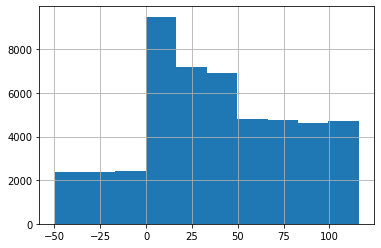

In [24]:
%matplotlib inline
age_dist = users['age_in_years'].hist()

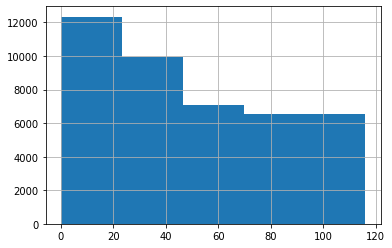

In [25]:
users[ users['age_in_years'] > 0]['age_in_years'].hist(bins = 5)

In [26]:
# get rid of the future date row users, and provide that age distribution to UX for their presentation. no, just do a numpy where to replace it with null values? 

In [27]:
users.dtypes

user_id                                int64
username                              object
password                              object
title                                 object
name                                  object
suffix                                object
sex                                   object
address                               object
email                                 object
birthdate                             object
credit_card_number                     int64
credit_card_expire                    object
credit_card_provider                  object
credit_card_security_code              int64
birthdate_time                datetime64[ns]
age                          timedelta64[ns]
age_years                             object
age_in_years                         float64
dtype: object

In [28]:
users.shape

(49609, 18)

In [29]:
users.shape[0] + len(cart[ cart['user_id'].notnull()])

118636

In [30]:
len(cart[ cart['user_id'].notnull()])

69027

###### What types of books are available? 

In [31]:
cart['category'].unique()

array(['Bibles', 'Study Aids', 'Biography & Autobiography', 'Nature',
       'Games & Activities', 'Fiction', 'Young Adult Nonfiction',
       'Mathematics', 'Social Science', 'Computers',
       'Foreign Language Study', 'Young Adult Fiction', 'Medical',
       'Reference', 'Education', 'Juvenile Fiction', 'Law', 'Travel',
       'Performing Arts', 'Technology & Engineering', 'Transportation',
       'House & Home', 'Humor', 'Science', 'Philosophy ',
       'Literary Collections', 'History', 'Antiques & Collectibles',
       'Self-Help', 'Cooking', 'Language Arts & Disciplines',
       'Political Science', 'Comics & Graphic Novels',
       'Family & Relationships', 'Gardening ', 'Drama', 'Design',
       'Psychology', 'Body, Mind & Spirit', 'Business & Economics',
       'Music', 'Religion', 'Pets', 'Literary Criticism', 'Poetry',
       'Architecture', 'Photography', 'Sports & Recreation',
       'Crafts & Hobbies', 'Juvenile Nonfiction', 'Health & Fitness',
       'True Crime', 'Art

In [32]:
len(cart['category'].unique()) # there are 53 different categories of books

53

In [33]:
cart['category'].value_counts()[:5]

Social Science                 2178
Science                        2100
Literary Collections           2059
Language Arts & Disciplines    2043
House & Home                   2033
Name: category, dtype: int64

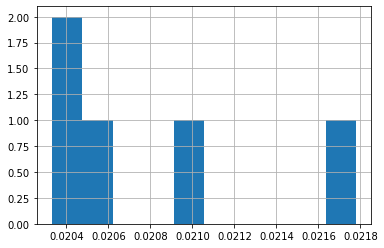

In [34]:
cart['category'].value_counts(normalize = True)[:5].hist()

### Breakdown book types Viewed, Added to Card, Purchased, Removed from Cart

In [35]:
# code goes here
# thought process: group by event type

cart.groupby('event_type')['category'].value_counts()

event_type  category              
cart        Social Science            629
            Bibles                    607
            Science                   594
            Humor                     587
            Photography               579
                                     ... 
view        Cooking                   771
            Nature                    761
            Body, Mind & Spirit       758
            Young Adult Nonfiction    757
            Reference                 756
Name: category, Length: 212, dtype: int64

join the user data and the cart data, before building the model to create the clusters later in the model

In [87]:
cart[ cart['event_type'] == 'purchase']['category'].value_counts()[:5]

Photography                    157
Drama                          154
Literary Collections           151
Language Arts & Disciplines    150
Social Science                 148
Name: category, dtype: int64

In [36]:
cart.columns

Index(['event_time', 'event_type', 'isbn', 'category', 'price', 'user_id',
       'user_agent'],
      dtype='object')

In [37]:
users.columns

Index(['user_id', 'username', 'password', 'title', 'name', 'suffix', 'sex',
       'address', 'email', 'birthdate', 'credit_card_number',
       'credit_card_expire', 'credit_card_provider',
       'credit_card_security_code', 'birthdate_time', 'age', 'age_years',
       'age_in_years'],
      dtype='object')

In [99]:
df = cart.join(users, on = 'user_id', lsuffix = '_cart', rsuffix = '_user', how = 'outer')

df['category'].value_counts()[:5]



Social Science                 2178
Science                        2100
Literary Collections           2059
Language Arts & Disciplines    2043
House & Home                   2033
Name: category, dtype: int64

In [105]:
df[ 
    (df['event_type'] == 'purchase') & (df['price'] >= 3)
]['category'].value_counts()[:5]

Antiques & Collectibles        82
Social Science                 79
Young Adult Nonfiction         79
Science                        79
Language Arts & Disciplines    78
Name: category, dtype: int64

In [110]:
df[ df['event_type'] == 'cart']['sex'].value_counts()

Series([], Name: sex, dtype: int64)

In [106]:
df[['sex', 'event_type']]

,sex,event_type
0.0,NaN,remove_from_cart
47013.0,NaN,remove_from_cart
1.0,NaN,view
5.0,NaN,view
16.0,NaN,cart
...,...,...
NaN,F,NaN
NaN,M,NaN
NaN,F,NaN
NaN,M,NaN


In [102]:
df['sex'].unique()

array([nan, 'F', 'M'], dtype=object)

In [95]:
df.head()

,user_id,event_time,event_type,isbn,category,price,user_id_cart,user_agent,user_id_user,username,...,email,birthdate,credit_card_number,credit_card_expire,credit_card_provider,credit_card_security_code,birthdate_time,age,age_years,age_in_years
0.0,566239468.0,2019-11-01 00:00:51 UTC,remove_from_cart,978-1-68177-962-1,Bibles,5.54,566239468.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_6 ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
47013.0,566239468.0,2019-11-18 08:43:17 UTC,remove_from_cart,978-1-932766-45-5,Transportation,2.38,566239468.0,Opera/8.93.(X11; Linux x86_64; ta-LK) Presto/2...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1.0,NaN,2019-11-01 00:02:02 UTC,view,978-1-121-11580-4,Study Aids,7.14,NaN,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
5.0,NaN,2019-11-01 00:11:12 UTC,view,978-0-604-08051-6,Fiction,1.43,NaN,Mozilla/5.0 (iPad; CPU iPad OS 10_3_3 like Mac...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
16.0,NaN,2019-11-01 00:55:53 UTC,cart,978-0-9542871-6-0,Juvenile Fiction,5.24,NaN,Mozilla/5.0 (Windows; U; Windows NT 6.1) Apple...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [40]:
df['category'].unique()

array(['Bibles', 'Transportation', 'Study Aids', 'Fiction',
       'Juvenile Fiction', 'Travel', 'Technology & Engineering', 'Humor',
       'Education', 'Literary Collections', 'Performing Arts',
       'Biography & Autobiography', 'Cooking', 'Family & Relationships',
       'Young Adult Nonfiction', 'Antiques & Collectibles',
       'Language Arts & Disciplines', 'Reference', 'Gardening ',
       'Science', 'Medical', 'Drama', 'Political Science', 'Self-Help',
       'Social Science', 'Pets', 'Music', 'Comics & Graphic Novels',
       'Religion', 'Literary Criticism', 'Mathematics', 'Psychology',
       'Sports & Recreation', 'History', 'Crafts & Hobbies',
       'Foreign Language Study', 'Young Adult Fiction', 'Photography',
       'Philosophy ', 'Health & Fitness', 'Business & Economics',
       'Design', 'Computers', 'True Crime', 'Juvenile Nonfiction', 'Art',
       'House & Home', 'Poetry', 'Architecture', 'Games & Activities',
       'Body, Mind & Spirit', 'Law', 'Nature', nan]

In [41]:
len(df)

149609

In [92]:
df = df[ 
    (df['age_in_years'] > 18) & 
    (df['age_in_years'] < 150)
]

In [93]:
df['category']

NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
      ... 
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
Name: category, Length: 32283, dtype: object

In [43]:
len(df)

32283

In [44]:
df.isna().sum()

user_id                          0
event_time                   32283
event_type                   32283
isbn                         32283
category                     32283
price                        32283
user_id_cart                 32283
user_agent                   32283
user_id_user                     0
username                         0
password                         0
title                        31654
name                             0
suffix                       31511
sex                              0
address                          0
email                            0
birthdate                        0
credit_card_number               0
credit_card_expire               0
credit_card_provider             0
credit_card_security_code        0
birthdate_time                   0
age                              0
age_years                        0
age_in_years                     0
dtype: int64

In [45]:
df['age_in_years'] # I'll only have Age for a user that completed a signup. 

NaN     60.309589
NaN     84.019178
NaN     20.476712
NaN    106.528767
NaN     67.128767
          ...    
NaN     53.802740
NaN     86.810959
NaN     90.389041
NaN     94.443836
NaN     47.082192
Name: age_in_years, Length: 32283, dtype: float64

Improvement: Customer Segments. only on people who purchased?
so take this joined df and look at only event_type purchased? 

In [46]:
# drop the timedelta columns

timedelta_cols = ['birthdate_time', 'age', 'age_years']

df.drop(columns = timedelta_cols, axis = 1, inplace = True)

In [47]:
cart.dtypes

event_time     object
event_type     object
isbn           object
category       object
price         float64
user_id       float64
user_agent     object
dtype: object

In [48]:
users.dtypes

user_id                                int64
username                              object
password                              object
title                                 object
name                                  object
suffix                                object
sex                                   object
address                               object
email                                 object
birthdate                             object
credit_card_number                     int64
credit_card_expire                    object
credit_card_provider                  object
credit_card_security_code              int64
birthdate_time                datetime64[ns]
age                          timedelta64[ns]
age_years                             object
age_in_years                         float64
dtype: object

In [49]:
df.columns

Index(['user_id', 'event_time', 'event_type', 'isbn', 'category', 'price',
       'user_id_cart', 'user_agent', 'user_id_user', 'username', 'password',
       'title', 'name', 'suffix', 'sex', 'address', 'email', 'birthdate',
       'credit_card_number', 'credit_card_expire', 'credit_card_provider',
       'credit_card_security_code', 'age_in_years'],
      dtype='object')

In [50]:
df.dtypes

user_id                      float64
event_time                    object
event_type                    object
isbn                          object
category                      object
price                        float64
user_id_cart                 float64
user_agent                    object
user_id_user                 float64
username                      object
password                      object
title                         object
name                          object
suffix                        object
sex                           object
address                       object
email                         object
birthdate                     object
credit_card_number           float64
credit_card_expire            object
credit_card_provider          object
credit_card_security_code    float64
age_in_years                 float64
dtype: object

In [51]:
df['age_in_years'].min()

18.002739726027396

In [52]:
df['age_in_years'].max()

116.08219178082192

In [88]:
df['category'].unique()

array([nan], dtype=object)

In [54]:
df2 = df[['user_id', 'event_time', 'event_type', 'isbn', 'category', 'price',
       'user_id_cart', 'user_agent', 'user_id_user', 'username', 'password',
       'title', 'name', 'suffix', 'sex', 'address', 'email', 'birthdate',
       'credit_card_number', 'credit_card_expire', 'credit_card_provider',
       'credit_card_security_code', 'age_in_years']]

In [55]:
df2['age_in_years'].min()

18.002739726027396

In [56]:
df2['age_in_years'].max()

116.08219178082192

In [57]:
df2['age_in_years'].dtype

dtype('float64')

In [58]:
def factorizeIt(data):
  data = data.apply(lambda x: pd.factorize(x)[0])
  return data


In [59]:
purchase_data = factorizeIt(df2)

In [60]:
purchase_data.head()

,user_id,event_time,event_type,isbn,category,price,user_id_cart,user_agent,user_id_user,username,...,suffix,sex,address,email,birthdate,credit_card_number,credit_card_expire,credit_card_provider,credit_card_security_code,age_in_years
NaN,0,-1,-1,-1,-1,-1,-1,-1,0,0,...,-1,0,0,0,0,0,0,0,0,0
NaN,1,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,0,1,1,1,1,1,0,1,1
NaN,2,-1,-1,-1,-1,-1,-1,-1,2,2,...,-1,0,2,2,2,2,2,1,2,2
NaN,3,-1,-1,-1,-1,-1,-1,-1,3,3,...,0,1,3,3,3,3,3,0,3,3
NaN,4,-1,-1,-1,-1,-1,-1,-1,4,4,...,1,0,4,4,4,4,4,0,4,4


In [61]:
purchase_data['age_in_years'].min()

0

### `KElbowVisualizer`

In [62]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/sampoad/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


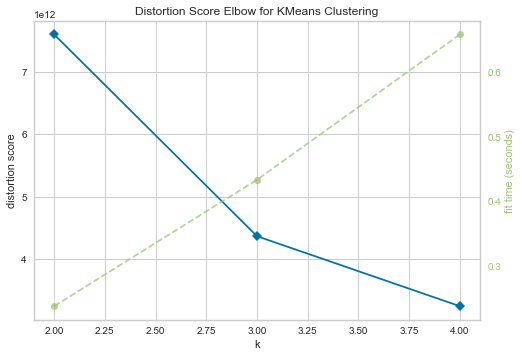

In [63]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 5))
visualizer.fit(purchase_data)
visualizer.poof()

In [64]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(purchase_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [66]:
df2['cluster'] = kmeans.labels_

In [67]:
df2.head()

,user_id,event_time,event_type,isbn,category,price,user_id_cart,user_agent,user_id_user,username,...,sex,address,email,birthdate,credit_card_number,credit_card_expire,credit_card_provider,credit_card_security_code,age_in_years,cluster
NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305464808.0,kirkt90,...,F,"88146 Brian Burg Suite 871\nSouth Marcton, NV ...",kirkt@yahoo.com,Nov 16 1959,4.448989e+15,01/26,VISA,648.0,60.309589,1
NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491534059.0,jodihester6,...,F,"52461 Joel Route Apt. 492\nWest Candace, IL 45057",jodihester@gmail.com,1936-03-07,3.573829e+15,04/21,VISA,46.0,84.019178,1
NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344018551.0,rosejudy96,...,F,"077 Patterson Mountains\nChristophermouth, HI ...",rosejudy@hotmail.com,09/06/99,5.177224e+15,06/26,Mastercard,35.0,20.476712,1
NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308521287.0,joshuakochdds21,...,M,"7083 Samantha Streets Suite 832\nAndrewview, C...",joshuakochdds@hotmail.com,Sep 08 1913,3.523788e+15,07/28,VISA,668.0,106.528767,1
NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,452820640.0,lydiaconleydvm53,...,F,"940 Ochoa Mission Apt. 380\nNew Emily, MT 39205",lydiaconleydvm@hotmail.com,1953-01-22,4.410442e+12,09/24,VISA,66.0,67.128767,1


### So who is our customer? Grabbed segment one

In [68]:
our_cust = df2[ df2['cluster'] == 1]

In [69]:
len(our_cust)

10467

In [70]:
len(purchase_data)

32283

In [71]:
our_cust.info

<bound method DataFrame.info of      user_id event_time event_type isbn category  price  user_id_cart  \
NaN      0.0        NaN        NaN  NaN      NaN    NaN           NaN   
NaN      2.0        NaN        NaN  NaN      NaN    NaN           NaN   
NaN      3.0        NaN        NaN  NaN      NaN    NaN           NaN   
NaN      4.0        NaN        NaN  NaN      NaN    NaN           NaN   
NaN      6.0        NaN        NaN  NaN      NaN    NaN           NaN   
..       ...        ...        ...  ...      ...    ...           ...   
NaN  18907.0        NaN        NaN  NaN      NaN    NaN           NaN   
NaN  18975.0        NaN        NaN  NaN      NaN    NaN           NaN   
NaN  20470.0        NaN        NaN  NaN      NaN    NaN           NaN   
NaN  20490.0        NaN        NaN  NaN      NaN    NaN           NaN   
NaN  21924.0        NaN        NaN  NaN      NaN    NaN           NaN   

    user_agent  user_id_user           username  ... sex  \
NaN        NaN   305464808.0   

In [72]:
our_cust.columns

Index(['user_id', 'event_time', 'event_type', 'isbn', 'category', 'price',
       'user_id_cart', 'user_agent', 'user_id_user', 'username', 'password',
       'title', 'name', 'suffix', 'sex', 'address', 'email', 'birthdate',
       'credit_card_number', 'credit_card_expire', 'credit_card_provider',
       'credit_card_security_code', 'age_in_years', 'cluster'],
      dtype='object')

In [73]:
our_cust['age_in_years'].mean()

62.34355096447917

In [74]:
our_cust['sex'].value_counts(normalize = True)

M    0.507022
F    0.492978
Name: sex, dtype: float64

In [75]:
our_cust['credit_card_provider'].value_counts(normalize = True)

VISA                           0.456387
Mastercard                     0.212955
Maestro                        0.087991
American Express               0.083978
Diners Club / Carte Blanche    0.081590
Discover                       0.077099
Name: credit_card_provider, dtype: float64

So our customer segment number one is 50% split on gender, 45% are VISA cardholders, and on average, 62 years old. how does a user persona work, should I narrow that down by gender to give updated totals? 

percentage of user ids who had added items to a cart that did NOT complete signup.

In [76]:
user_persona = our_cust[ our_cust['sex'] == 'F']

In [77]:
user_persona['age_in_years'].mean()

62.34103695444419

In [78]:
user_persona['credit_card_provider'].value_counts(normalize = True)

VISA                           0.456202
Mastercard                     0.215310
Maestro                        0.091473
American Express               0.081395
Diners Club / Carte Blanche    0.078488
Discover                       0.077132
Name: credit_card_provider, dtype: float64

In [79]:
user_persona.dtypes

user_id                      float64
event_time                    object
event_type                    object
isbn                          object
category                      object
price                        float64
user_id_cart                 float64
user_agent                    object
user_id_user                 float64
username                      object
password                      object
title                         object
name                          object
suffix                        object
sex                           object
address                       object
email                         object
birthdate                     object
credit_card_number           float64
credit_card_expire            object
credit_card_provider          object
credit_card_security_code    float64
age_in_years                 float64
cluster                        int32
dtype: object

In [80]:
user_persona['category'].value_counts(normalize = True)

Series([], Name: category, dtype: float64)

In [81]:
user_persona.category

NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
      ... 
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
Name: category, Length: 5160, dtype: object

In [82]:
our_cust['category']

NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
      ... 
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
Name: category, Length: 10467, dtype: object

In [83]:
df2['category']

NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
      ... 
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
Name: category, Length: 32283, dtype: object

In [135]:
users.dropna(subset = ['user_id'], inplace = True)

In [134]:
cart.dropna(subset = ['user_id'], inplace = True)

In [149]:
final = cart.join(users, on = 'user_id', lsuffix = '_cart', rsuffix = '_user', how = 'outer')

In [150]:
final.groupby('event_type')['category'].value_counts()

event_type  category              
cart        Social Science            427
            Bibles                    396
            Medical                   392
            Political Science         392
            Photography               391
                                     ... 
view        Reference                 518
            Nature                    512
            Young Adult Nonfiction    511
            Cooking                   509
            Body, Mind & Spirit       507
Name: category, Length: 212, dtype: int64

In [151]:
cart['user_id'].dtype

dtype('float64')

In [158]:
cart['user_id'].isna().sum()

0

In [159]:
users['user_id'].isna().sum()

0

In [152]:
users['user_id'].dtype

dtype('float64')

In [153]:
users['user_id'] = users['user_id'].astype('float64')

In [154]:
users['user_id'].dtype

dtype('float64')

In [155]:
final[
    (final['sex'] == 'F') & 
    (final['event_type'] == 'purchase') 
#     (final['credit_card_provider'] == 'VISA')
]#['category'].value_counts()

,user_id,event_time,event_type,isbn,category,price,user_id_cart,user_agent,user_id_user,username,...,email,birthdate,credit_card_number,credit_card_expire,credit_card_provider,credit_card_security_code,birthdate_time,age,age_years,age_in_years


In [156]:
final.dtypes

user_id                              float64
event_time                            object
event_type                            object
isbn                                  object
category                              object
price                                float64
user_id_cart                         float64
user_agent                            object
user_id_user                         float64
username                              object
password                              object
title                                 object
name                                  object
suffix                                object
sex                                   object
address                               object
email                                 object
birthdate                             object
credit_card_number                   float64
credit_card_expire                    object
credit_card_provider                  object
credit_card_security_code            float64
birthdate_

In [157]:
final[['sex', 'event_type']]

,sex,event_type
0.0,NaN,remove_from_cart
47013.0,NaN,remove_from_cart
2.0,NaN,cart
4.0,NaN,view
2036.0,NaN,view
...,...,...
NaN,F,NaN
NaN,M,NaN
NaN,F,NaN
NaN,M,NaN


In [160]:
final2 = cart.merge(users, how = 'inner', on = 'user_id')

In [161]:
final2[['sex', 'event_type']]

,sex,event_type
0,M,remove_from_cart
1,M,remove_from_cart
2,M,cart
3,M,view
4,M,view
...,...,...
69022,F,purchase
69023,F,purchase
69024,M,purchase
69025,M,purchase


In [164]:
final2[
    (final2['sex'] == 'F') & 
    (final2['event_type'] == 'purchase') &
    (final2['credit_card_provider'] == 'VISA')
]['category'].value_counts()[:5]

Language Arts & Disciplines    54
Young Adult Fiction            40
Literary Collections           40
House & Home                   39
Crafts & Hobbies               38
Name: category, dtype: int64

In [167]:
final2[
    (final2['sex'] == 'F') & 
    (final2['event_type'] == 'purchase') &
    (final2['credit_card_provider'] == 'VISA')
]['isbn'].value_counts()[:10]

978-1-06-285759-7    3
978-1-9847-0952-3    3
978-1-878170-62-0    2
978-0-947602-38-3    2
978-0-692-39877-7    2
978-0-238-08383-9    2
978-0-608-16081-8    2
978-0-665-27884-6    2
978-1-111-54399-0    2
978-1-71354-310-7    2
Name: isbn, dtype: int64

In [ ]:
Language Arts & Disciplines
Young Adult Fiction
Literary Collections
House & Home
Crafts & Hobbies

In [ ]:
uppercase letters 3 of them 26^3

62^5

In [169]:
users['password'] 5 characters, 

0        7QjsS
1        f5XfW
2        8xwDc
3        6AjYt
4        s8Eld
         ...  
49604    4YGl5
49605    6oZjW
49606    2V2pC
49607    8xAac
49608    6W8k8
Name: password, Length: 49609, dtype: object

In [172]:
62 ** 5

916132832

916 million password combinations

In [175]:
sec_decrypt1 = 916132832 / 2000000000
sec_decrypt1

0.458066416

In [176]:
sec_decrypt2 = (73 ** 8) / 2000000000
sec_decrypt2

403230.0459470405

In [180]:
sec_decrypt2 / (3600 * 24)

4.667014420683339

In [ ]:
786-747-0717

In [ ]:
%d%d%d - %d%d%d - %d%d%d%d

In [ ]:
+1(123) 123-123213